In [37]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt

from probability import *
from aaa_algorithms import *
from spectral_transforms import *
from numerical import *

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=8)
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r"\usepackage{amsfonts}" + "\n" + r"\usepackage{amsmath}" + "\n" + r"\usepackage{amssymb}"
})

### Fit kernel $K$ as sum of exponentials and then invert to find $J$

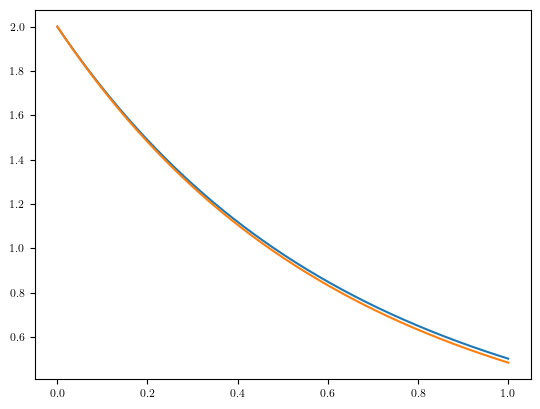

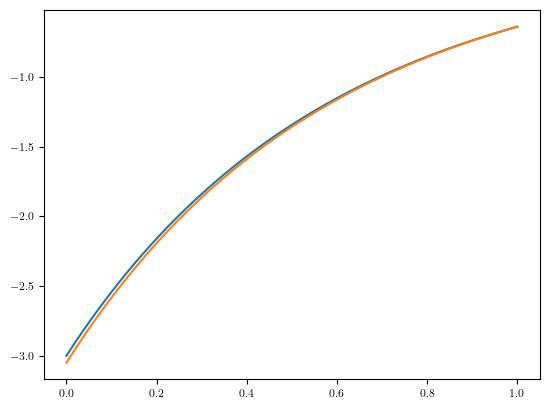

In [38]:
t = np.linspace(0, 1, 1000)
lmbda = Distribution(None, np.array([1, 2]), np.array([1, 1]))
K = exp_kernel(lmbda, t)
Kdot = exp_kernel(lmbda, t, 1)

#lmbda_a, lmbda_b = fit_exp_sum(K, t, 100, init="random", opt_iter=int(1e4))
#lmbda_a = lmbda_a[lmbda_b > 0]
#lmbda_b = lmbda_b[lmbda_b > 0]

lmbda_a = np.array([1.05, 2])
lmbda_b = np.array([1, 1])
lmbda_hat = Distribution(None, lmbda_a, lmbda_b)

t2 = np.linspace(0, 1, 1000)

K_hat = exp_kernel(lmbda_hat, t2)
Kdot_hat = exp_kernel(lmbda_hat, t2, 1)

plt.plot(t, K)
plt.plot(t2, K_hat)
plt.show()

plt.plot(t, Kdot)
plt.plot(t2, Kdot_hat)
plt.show()

#print(np.linalg.norm(K - K_hat)/np.linalg.norm(K))

In [39]:
#K = 1/(t+1) + 1/(t+2) + 1/(t + 5)
#t = np.logspace(-10, 2, 10000)
t = np.linspace(0, 100, 10000)
K = np.exp(-t)
K_ext = analytic_continuation(K, t, aaa_iters=100)

In [40]:
pol, res, _, _, _, _ = aaa(t, K, max_terms=100)
s = np.linspace(0, 2, 1000)
Linvu = lambda x: np.exp(pol*x[:, None]) @ res

plt.plot(s, Linvu(s))
plt.show()

KeyboardInterrupt: 

In [20]:
def inverse_laplace_transform(us, xs, s, aaa_iters=100):
    # Numerically integrate with left-hand Riemann sum to obtain approximation of Laplace transform
    Lu = np.exp(-s[:, None]*xs[:-1]) @ (us[:-1] * np.diff(xs))
    pol, res, _, _, _, _ = aaa(s, Lu, max_terms=aaa_iters)
    return pol, res

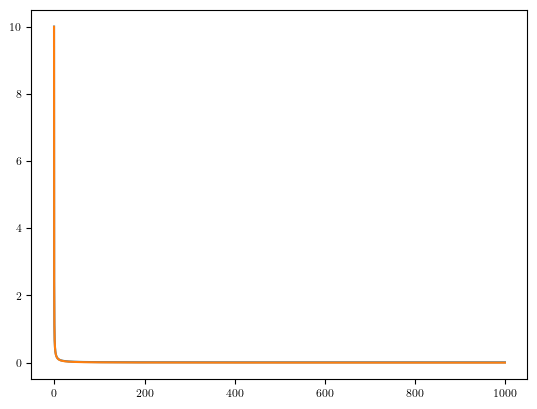

0.009001453711422316


In [ ]:
s = np.logspace(-1, 3, 1000) - 1
Lu = np.exp(-s[:, None]*t[:-1]) @ (K[:-1] * np.diff(t))
plt.plot(s, Lu)
plt.plot(s, 1/(s+1))
plt.show()

print(np.max(np.abs(Lu - 1/(s+1))))

In [ ]:
pol, res, _, _, _, _ = aaa(s, Lu, max_terms=100)
print(pol)
print(res)

[ 7.67021036e+03+0.00000000e+00j  6.72258794e+00+6.59169248e+02j
  6.72258794e+00-6.59169248e+02j -9.26087607e-01+1.46837851e-01j
 -9.26087607e-01-1.46837851e-01j -9.74494147e-01+1.16255350e-01j
 -9.74494147e-01-1.16255350e-01j -1.00587169e+00+8.88681790e-02j
 -1.00587169e+00-8.88681790e-02j -1.02685079e+00+6.28305459e-02j
 -1.02685079e+00-6.28305459e-02j -1.03993143e+00+3.74688555e-02j
 -1.03993143e+00-3.74688555e-02j -1.04624874e+00+1.24522913e-02j
 -1.04624874e+00-1.24522913e-02j]
[-1.34012126e+02-0.00000000e+00j  1.31451225e+00-8.86478660e-02j
  1.31451225e+00+8.86478660e-02j  1.71274900e-05-3.87338054e-05j
  1.71274901e-05+3.87338058e-05j -1.12437411e-03+4.83575060e-03j
 -1.12437411e-03-4.83575059e-03j -3.43899875e-02-1.13420770e-01j
 -3.43899875e-02+1.13420770e-01j  8.69818043e-01+5.80070786e-01j
  8.69818043e-01-5.80070786e-01j -4.14227193e+00+9.06628636e-01j
 -4.14227193e+00-9.06628636e-01j  3.80795091e+00-7.61148245e+00j
  3.80795091e+00+7.61148245e+00j]


/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


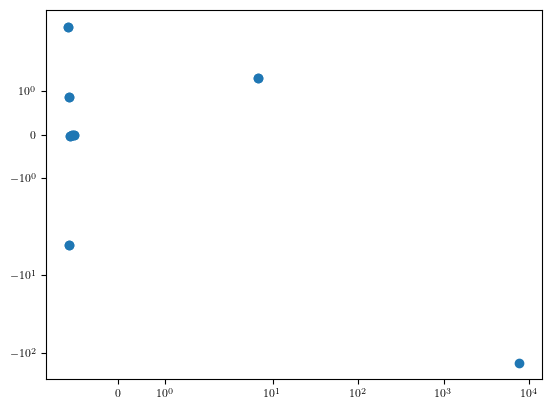

In [110]:
plt.scatter(pol, res)
plt.xscale("symlog")
plt.yscale("symlog")
plt.show()

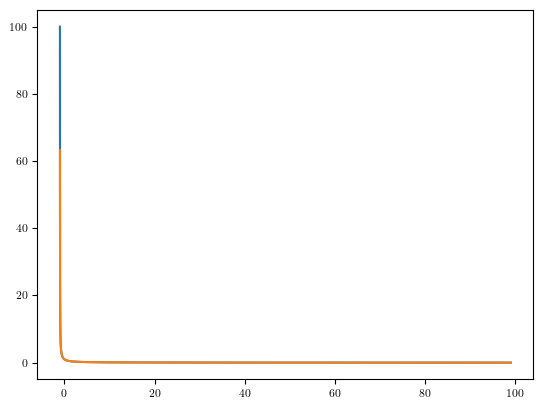

In [107]:
plt.plot(s, 1/(s+1))
plt.plot(s, 1/(s[:, None] - pol) @ res)

/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


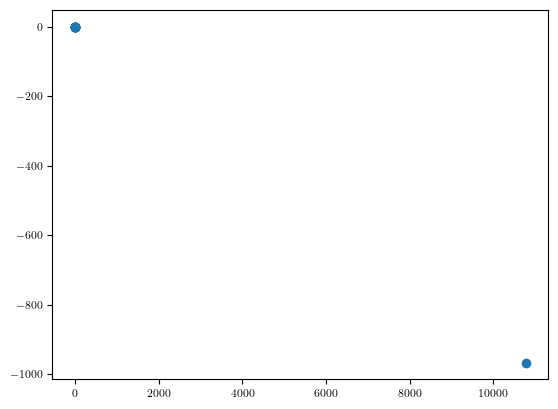

/var/folders/pw/wkdn0vxs0b54swhpwjg6s0x00000gn/T/ipykernel_53330/3120682844.py:9: RuntimeWarning: overflow encountered in exp
  plt.plot(t, np.exp(pol*t[:, None])@res)
/var/folders/pw/wkdn0vxs0b54swhpwjg6s0x00000gn/T/ipykernel_53330/3120682844.py:9: RuntimeWarning: invalid value encountered in matmul
  plt.plot(t, np.exp(pol*t[:, None])@res)
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


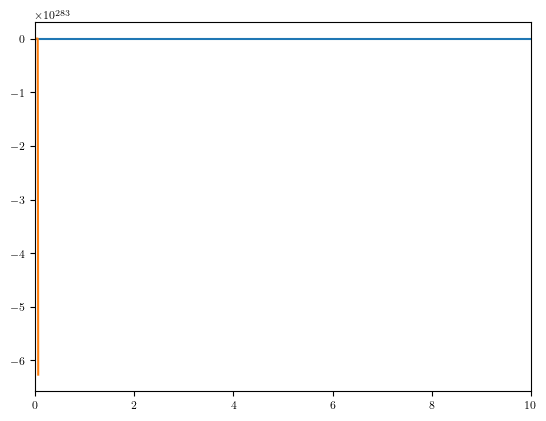

In [57]:
#s = np.logspace(-2, 2, 1000)
s = np.linspace(-0.9, 1, 1000)
pol, res = inverse_laplace_transform(K, t, s, aaa_iters=100)

plt.scatter(pol, res)
plt.show()

plt.plot(t, K)
plt.plot(t, np.exp(pol*t[:, None])@res)
plt.xlim(-0.01, 10)
plt.show()

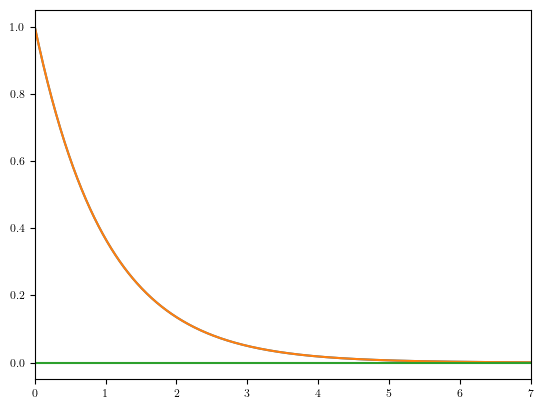

4.909246342776896e-08


In [ ]:
plt.plot(t, K)
plt.plot(t, np.real(K_ext(t)))
plt.plot(t, np.imag(K_ext(t)))
plt.xlim(0, 7)
plt.show()

print(np.max(np.abs(np.real(K_ext(t)) - K)))

In [320]:
type(float(x.real) + 1j*float(x.imag))

complex

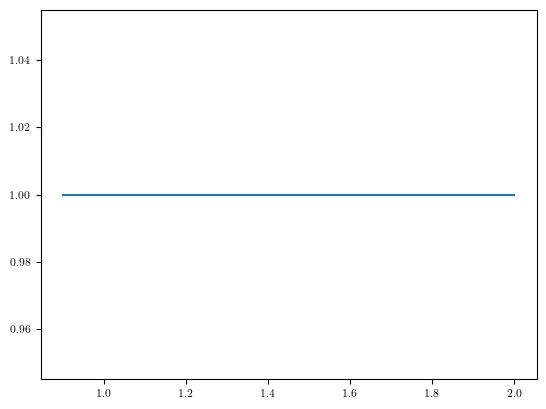

In [149]:
plt.plot(lmbda_hat.atoms, lmbda_hat.atom_wts)
plt.show()

right root found
right root found


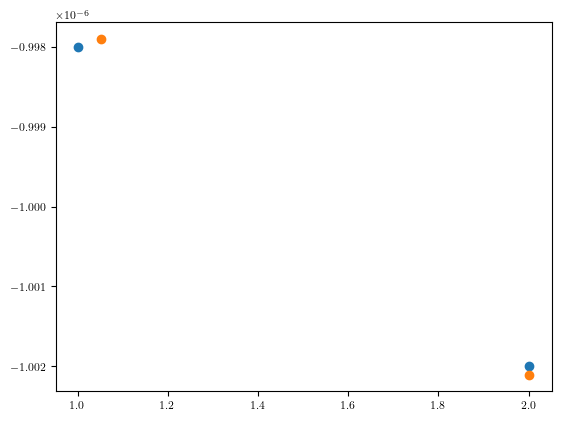

0.001 0.0
0.001 0.0


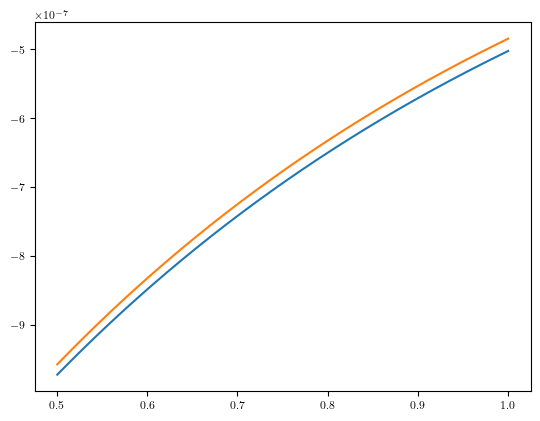

In [ ]:
c0 = 1000
c1 = 0
mu, zeta0, zeta1 = volterra_cm_spectral_inversion(lmbda, c0, c1)
mu_hat, zeta0_hat, zeta1_hat = volterra_cm_spectral_inversion(lmbda_hat, c0, c1)

plt.scatter(mu.atoms, mu.atom_wts)
plt.scatter(mu_hat.atoms, mu_hat.atom_wts)
plt.show()

J = exp_kernel(mu, t)
J_hat = exp_kernel(mu_hat, t)

print(zeta0, zeta1)
print(zeta0_hat, zeta1_hat)

plt.plot(t[t >= 0.5], J[t >= 0.5])
plt.plot(t[t >= 0.5], J_hat[t >= 0.5])
plt.show()

In [207]:
np.linalg.norm(J - J_hat)/np.linalg.norm(J)

3.4756351491943756e-06

### Fit kernel $K$ as sum of cosines and then invert to find $J$

/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


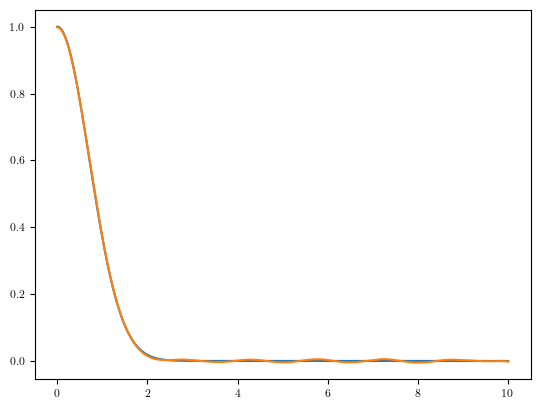

0.01092727066068378


In [ ]:
t = np.linspace(0, 10, 1000)
K = np.exp(-t**2)# + np.exp(-t) + 1/4*np.cos(10*t) + 1/4*np.cos(50*t)

density = lambda x: np.sqrt(math.pi)*np.exp(-x**2/4) #lambda x: np.sqrt(math.pi)*np.exp(-x**2/4) + 2/(1 + x**2)
atoms = np.array([]) #np.array([-50, -10, 10, 50])
atom_wts = np.array([]) #np.array([1, 1, 1, 1])/8
quad_pts, quad_wts = trap_quad(-100, 100, 10000)
lmbda = Distribution(density, atoms, atom_wts, quad_pts, quad_wts)

lmbda_a, lmbda_b = fit_cos_sum(K, t, 1000, init="dct", opt_iter=1000)
lmbda_a, lmbda_b = symmetrize_dist(lmbda_a, lmbda_b, halve_center=False)
assert(np.linalg.norm(lmbda_a + np.flip(lmbda_a)) < 1e-10)
assert(np.linalg.norm(lmbda_b - np.flip(lmbda_b)) < 1e-10)
lmbda_hat = Distribution(None, lmbda_a, lmbda_b, quad_pts, quad_wts)

K_hat = complex_exp_kernel(lmbda_hat, t)

plt.plot(t, K)
plt.plot(t, K_hat)
plt.show()

print(np.linalg.norm(K - K_hat)/np.linalg.norm(K))

In [91]:
np.sum(density(quad_pts) * quad_wts)

6.283185307179585

In [93]:
np.sum(lmbda_b**2)

0.017587952952963778

In [96]:
np.sum(K**2) * (t[1] - t[0])

0.6316620736627551

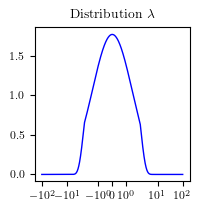

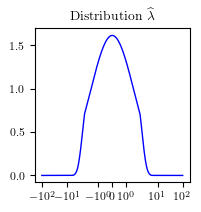

In [ ]:
fig, ax = plt.subplots(figsize=(2, 2))
ax.set_title("Distribution $\lambda$")
if lmbda.density is not None:
    ax.plot(lmbda.quad_pts, lmbda.density_vals, color="blue", linewidth=1)
ax.scatter(lmbda.atoms, lmbda.atom_wts, marker='o', color="blue", s=12)
ax.vlines(lmbda.atoms, ymin=0, ymax=lmbda.atom_wts, color="blue", linewidth=1)
#ax.set_xlim(0, 20)
#plt.savefig(f"figures/lmbda.pdf", bbox_inches='tight')
plt.xscale("symlog")
plt.show()

fig, ax = plt.subplots(figsize=(2, 2))
ax.set_title("Distribution $\widehat{\lambda}$")
density_hat = scipy.stats.gaussian_kde(lmbda_a, weights=lmbda_b)
ax.plot(lmbda_hat.quad_pts, np.sum(lmbda_b)*density_hat(lmbda_hat.quad_pts), color="blue", linewidth=1)
#if lmbda_hat.density is not None:
#    ax.plot(lmbda_hat.quad_pts, lmbda_hat.density_vals, color="blue", linewidth=1)
#ax.scatter(lmbda_hat.atoms, lmbda_hat.atom_wts, marker='o', color="blue", s=12)
#ax.vlines(lmbda_hat.atoms, ymin=0, ymax=lmbda_hat.atom_wts, color="blue", linewidth=1)

#ax.set_xlim(0, 20)
#plt.savefig(f"figures/lmbda_hat.pdf", bbox_inches='tight')
plt.xscale("symlog")
plt.show()

left and right roots found


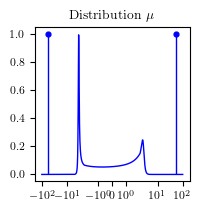

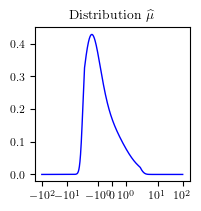

0.0 0.0
0.0 0.0


/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/georgestepaniants/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


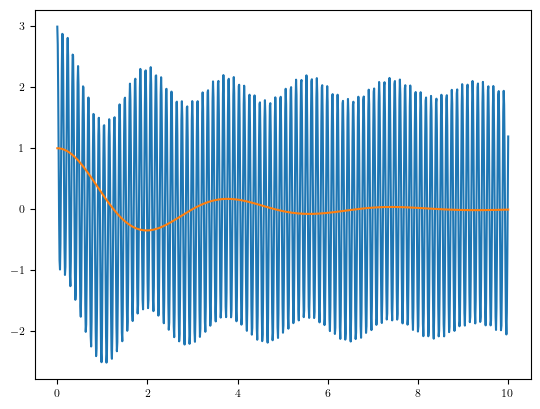

In [84]:
c0 = 1
c1 = 1
mu, zeta0, zeta1 = volterra_pd_spectral_inversion(lmbda, c0, c1)
mu_hat, zeta0_hat, zeta1_hat = volterra_pd_spectral_inversion(lmbda_hat, c0, c1)


fig, ax = plt.subplots(figsize=(2, 2))
ax.set_title("Distribution $\mu$")
if mu.density is not None:
    ax.plot(mu.quad_pts, mu.density_vals, color="blue", linewidth=1)
ax.scatter(mu.atoms, mu.atom_wts, marker='o', color="blue", s=12)
ax.vlines(mu.atoms, ymin=0, ymax=mu.atom_wts, color="blue", linewidth=1)
#ax.set_xlim(0, 20)
#plt.savefig(f"figures/mu.pdf", bbox_inches='tight')
plt.xscale("symlog")
plt.show()

fig, ax = plt.subplots(figsize=(2, 2))
ax.set_title("Distribution $\widehat{\mu}$")
density_hat = scipy.stats.gaussian_kde(mu_hat.atoms, weights= mu_hat.atom_wts)
ax.plot(mu_hat.quad_pts, density_hat(mu_hat.quad_pts), color="blue", linewidth=1)
#if mu_hat.density is not None:
#    ax.plot(mu_hat.quad_pts, mu_hat.density_vals, color="blue", linewidth=1)
#ax.scatter(mu_hat.atoms, mu_hat.atom_wts, marker='o', color="blue", s=12)
#ax.vlines(mu_hat.atoms, ymin=0, ymax=mu_hat.atom_wts, color="blue", linewidth=1)
#ax.set_xlim(0, 20)
#plt.savefig(f"figures/mu_hat.pdf", bbox_inches='tight')
plt.xscale("symlog")
plt.show()

J = complex_exp_kernel(mu, t)
J_hat = complex_exp_kernel(mu_hat, t)

print(zeta0, zeta1)
print(zeta0_hat, zeta1_hat)

plt.plot(t, J)
plt.plot(t, J_hat)
plt.show()

In [28]:
t = np.linspace(0, 1, 100)
K = np.exp(-1j*t)
dt = t[1] - t[0]
n = len(t)
omegas = -np.fft.fftfreq(n, d=dt/(2*math.pi))
betas = (1/n)*np.fft.fft(K, norm=None)
betas = np.real(betas)
betas[betas < 0] = 0

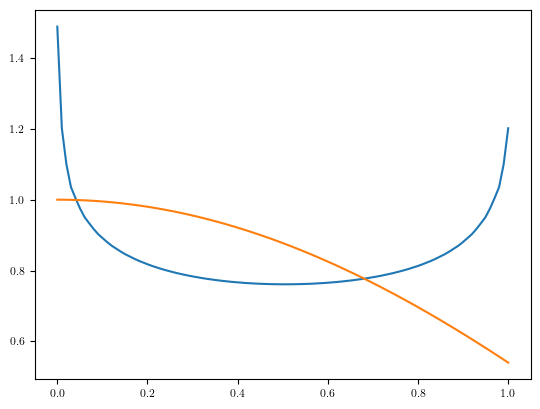

In [29]:
plt.plot(t, np.exp(-1j*omegas*t[:, None]) @ betas)
plt.plot(t, K)
plt.show()

In [30]:
omegas, betas = fit_complex_exp_sum(K, t, len(omegas), init="dft", omega_init_min=None, omega_init_max=None, omega_min=1, omega_max=1, opt_iter=1000, lr=1e-1)

/Users/georgestepaniants/Research/time-deconvolution/spectral_transforms.py:306: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1646756029501/work/aten/src/ATen/native/Copy.cpp:239.)
  x_torch = torch.DoubleTensor(x)


In [2]:
t = np.linspace(0, 10, 1000)
t = t[1:]
K = 1/(t + 1) + np.exp(-t) + np.log(1 + 1/t)

AAA failed to converge within 4 iterations.
AAA failed to converge within 4 iterations.
4


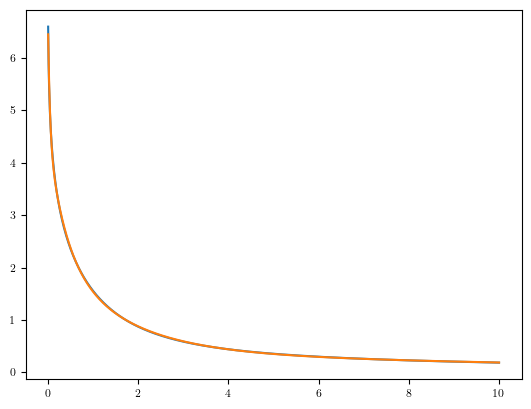

0.01001957334474184


In [13]:
omegas, betas = fit_exp_sum(K, t, 4, init="aaa", opt_iter=1000, lr=1e-2)
print(len(omegas))
K_hat = np.exp(-t[:, None]*omegas) @ betas

plt.plot(t, K)
plt.plot(t, K_hat)
plt.show()

print(np.linalg.norm(K_hat - K)/np.linalg.norm(K))

In [ ]:
s = np.logspace(0, 2, 1000)
_, pol, res = aaa_exp_sum(K, t, s, aaa_iters=100, real_symm=True, max_exp=0.5)

/Users/georgestepaniants/Research/time-deconvolution/aaa_algorithms.py:171: RuntimeWarning: invalid value encountered in multiply
  y = np.exp(x) * scipy.special.exp1(x)


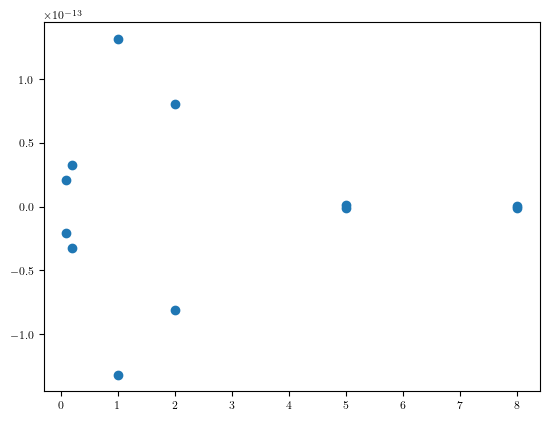

In [62]:
plt.scatter(np.real(pol), np.imag(pol))
plt.show()

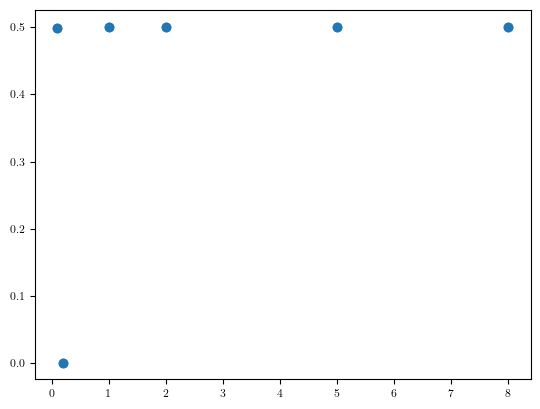

In [ ]:
assert(np.all(np.abs(np.imag(pol)) < 1e-10))
assert(np.all(np.abs(np.imag(res)) < 1e-10))
omegas = np.real(pol)
betas = np.real(res)

plt.scatter(omegas, betas)
plt.show()

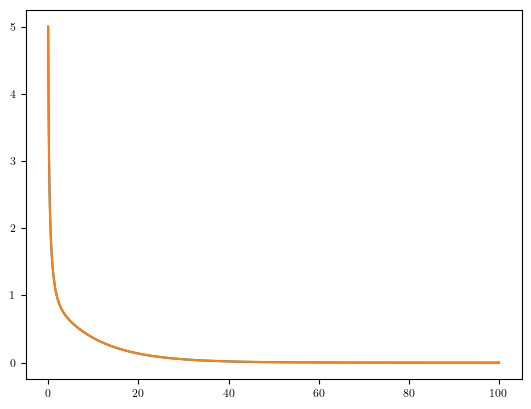

8.871474078541632e-05


In [ ]:
K_hat = np.exp(-t[:, None]*omegas) @ betas

plt.plot(t, K_hat)
plt.plot(t, K)
plt.show()

print(np.linalg.norm(K_hat - K)/np.linalg.norm(K))